In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
gosp = pd.read_excel("gospodarstwa.xlsx").dropna()
gosp = gosp.loc[gosp.dochg >0]
gosp.head()

,klm,woj,trb,zut,d21,d32,d345,d347,d348,d36,d38,d61,d63,los,dochg,wydg
0,1,2,11,5,2,1,1,2,1,69,2,3,3,1.0,1191.41,1037.29
1,1,2,6,1,2,1,2,2,1,74,3,4,2,2.0,821.00,887.01
2,1,2,3,1,1,3,1,2,1,83,3,4,1,4.0,6669.87,6792.13
3,1,2,12,5,2,1,3,3,2,44,2,4,1,3.0,1872.59,1806.83
4,1,2,1,5,1,3,1,2,1,110,5,4,2,2.0,1731.44,2795.08


# Tabele przestawne z `pd.pivot_table`

Zaczniemy od tabel przestawnych w pandas. Do tego służy funkcja `pivot_table`, która ma następujace argumenty:

  + `data` -- zbiór danych (ramka danych)
  + `values` -- podajemy jaką zmienną agregujemy
  + `index` -- według jakiej zmiennej agregujemy
  + `aggfunc` -- funkcja, którą wykorzystujemy do agregacji

In [5]:
pd.pivot_table(data = gosp, values = "dochg", index = "klm", aggfunc = "mean")

,dochg
klm,
1,2717.274306
2,2278.732023
3,2098.115417
4,2104.753672
5,2026.121005
6,1932.435334


In [6]:
gosp.pivot_table(values = "dochg", index = "klm", aggfunc = "mean")

,dochg
klm,
1,2717.274306
2,2278.732023
3,2098.115417
4,2104.753672
5,2026.121005
6,1932.435334


In [8]:
gosp.pivot_table(values = 'dochg', index = 'woj', columns = 'klm', aggfunc = "count")

klm,1,2,3,4,5,6
woj,,,,,,
2,639.0,NaN,241.0,684.0,407.0,691.0
4,NaN,480.0,266.0,95.0,355.0,541.0
6,NaN,335.0,NaN,388.0,200.0,887.0
8,NaN,NaN,240.0,146.0,195.0,242.0
10,883.0,NaN,NaN,647.0,215.0,717.0
12,747.0,NaN,95.0,333.0,286.0,1077.0
14,1739.0,242.0,73.0,661.0,452.0,1310.0
16,NaN,NaN,168.0,192.0,167.0,376.0
18,NaN,NaN,142.0,385.0,192.0,806.0


In [10]:
gosp.pivot_table(values = ["dochg", "wydg"], index = "klm", aggfunc = np.mean)

,dochg,wydg
klm,,
1,2717.274306,2527.413060
2,2278.732023,2142.426147
3,2098.115417,1996.723736
4,2104.753672,1988.971737
5,2026.121005,1906.742404
6,1932.435334,1802.402206


In [15]:
gosp.pivot_table(values = ["dochg", "wydg"], index = "klm", aggfunc = lambda x: sum(x > 10000))

,dochg,wydg
klm,,
1,55.0,45.0
2,11.0,16.0
3,2.0,18.0
4,11.0,28.0
5,10.0,17.0
6,33.0,20.0


In [16]:
gosp.pivot_table(values = ["dochg", "wydg"], index = "klm", aggfunc = lambda x: np.mean(x)/np.median(x))

,dochg,wydg
klm,,
1,1.234996,1.248598
2,1.151861,1.180374
3,1.127249,1.183935
4,1.137705,1.181735
5,1.158512,1.186501
6,1.187277,1.185409


In [19]:
gosp.pivot_table(values = 'dochg', 
                 index = ["klm", "d347"], 
                 aggfunc = [np.mean, np.median])

mean    median
                dochg     dochg
klm d347                       
1   1     2787.887148  2300.000
    2     2870.089670  2311.000
    3     1613.160072  1311.220
    4     2753.901900  2017.700
    5     1076.751818  1044.500
2   1     2396.283861  2086.650
    2     2298.718789  1974.650
    3     1574.002969  1404.650
    4     2285.931382  2000.000
    5     1416.370833   837.730
3   1     2217.522893  1987.810
    2     2246.584228  1980.500
    3     1355.470977  1198.320
    4     2319.930500  2000.000
    5     1055.100000  1055.100
4   1     2205.732575  1947.280
    2     2294.275993  2000.970
    3     1393.294524  1240.990
    4     2198.131369  1898.285
    5     2025.258947  1684.540
5   1     2104.362796  1864.195
    2     2155.747528  1893.235
    3     1387.038309  1243.565
    4     2789.680758  2019.530
    5     1585.082857  1678.100
6   1     2155.122529  1910.960
    2     2162.526054  1818.000
    3     1425.100199  1228.130
    4     2143.275956  1850.000
    5     1436.190000  1282.735

In [23]:
gosp.pivot_table(values = 'dochg', 
                 index = ["klm", "d347"], 
                 aggfunc = {"dochg": np.mean})

dochg
klm d347             
1   1     2787.887148
    2     2870.089670
    3     1613.160072
    4     2753.901900
    5     1076.751818
2   1     2396.283861
    2     2298.718789
    3     1574.002969
    4     2285.931382
    5     1416.370833
3   1     2217.522893
    2     2246.584228
    3     1355.470977
    4     2319.930500
    5     1055.100000
4   1     2205.732575
    2     2294.275993
    3     1393.294524
    4     2198.131369
    5     2025.258947
5   1     2104.362796
    2     2155.747528
    3     1387.038309
    4     2789.680758
    5     1585.082857
6   1     2155.122529
    2     2162.526054
    3     1425.100199
    4     2143.275956
    5     1436.190000

In [29]:
tabela = gosp.pivot_table(values = 'dochg', 
                          index = ["klm", "d347"], 
                          aggfunc = [np.mean, np.median])

tabela.stack().reset_index()

,klm,d347,level_2,mean,median
0,1,1,dochg,2787.887148,2300.000
1,1,2,dochg,2870.089670,2311.000
2,1,3,dochg,1613.160072,1311.220
3,1,4,dochg,2753.901900,2017.700
4,1,5,dochg,1076.751818,1044.500
5,2,1,dochg,2396.283861,2086.650
6,2,2,dochg,2298.718789,1974.650
7,2,3,dochg,1574.002969,1404.650
8,2,4,dochg,2285.931382,2000.000
9,2,5,dochg,1416.370833,837.730


In [38]:
gosp.pivot_table(values = "wydg", index = "klm", 
                 aggfunc = {('pow_5k' , lambda x: sum(x > 5000)), 
                            ('pow_10k', lambda x: sum(x > 10000))})

,pow_10k,pow_5k
klm,,
1,45.0,370.0
2,16.0,135.0
3,18.0,76.0
4,28.0,172.0
5,17.0,107.0
6,20.0,241.0


# Wizualizacja danych z pakietem `seaborn`

Tworzymy histogram z wykorzystaniem pakietu `seaborn`

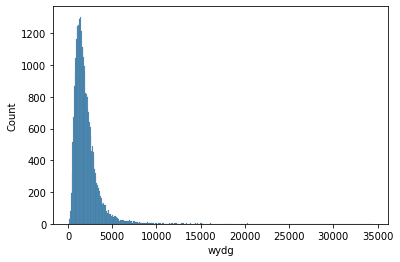

In [41]:
sns.histplot(data = gosp, x = "wydg")

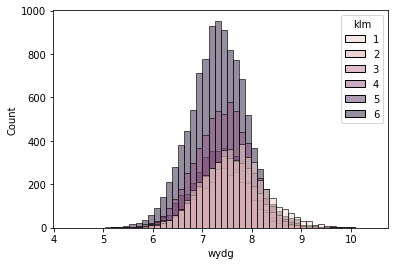

In [50]:
sns.histplot(x = np.log(gosp["wydg"]), bins = 50)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


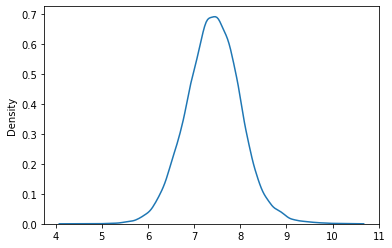

In [56]:
sns.distplot(x = np.log(gosp["wydg"]), bins = 50, hist= False)

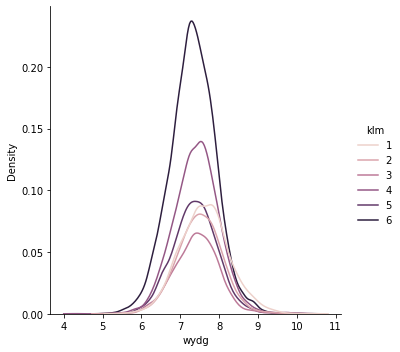

In [59]:
sns.displot(x = np.log(gosp["wydg"]), kind = "kde",  hue = gosp["klm"])

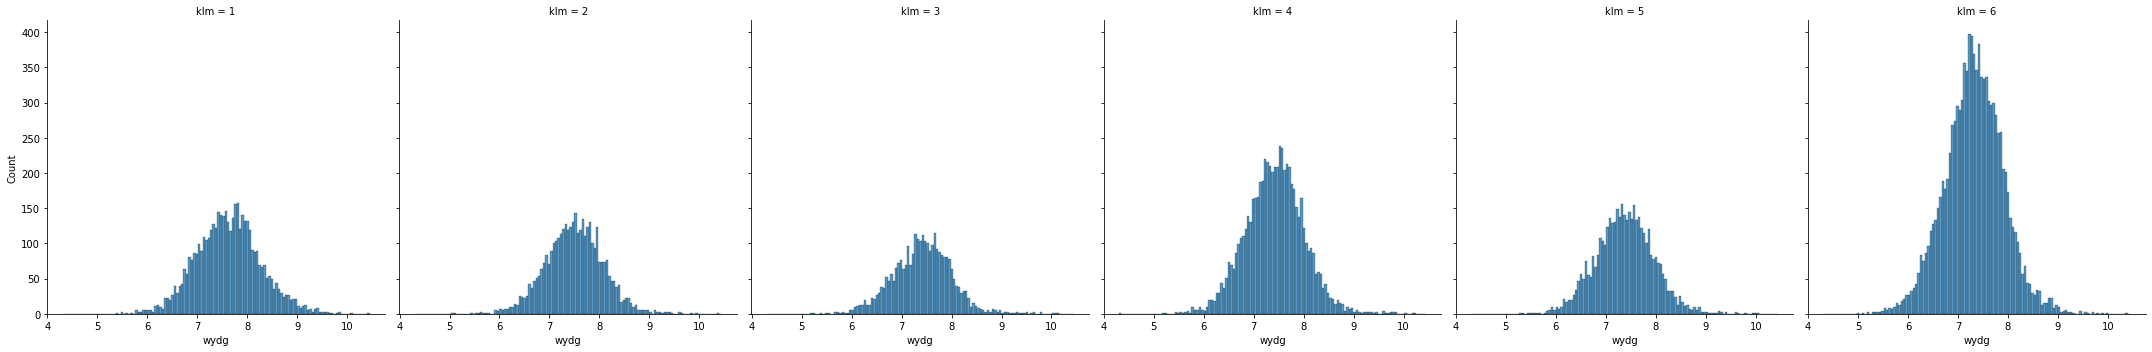

In [62]:
sns.displot(x = np.log(gosp["wydg"]), kind = "hist", col = gosp["klm"])

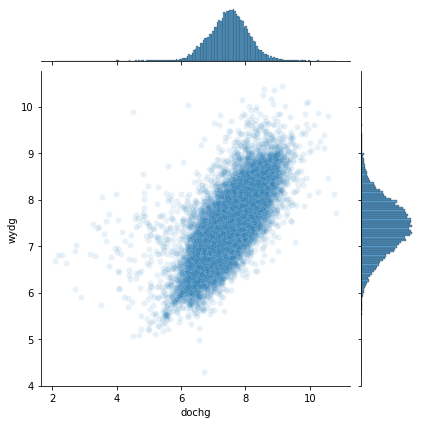

In [71]:
sns.jointplot(x = np.log(gosp["dochg"]), y = np.log(gosp["wydg"]), alpha = 0.1)

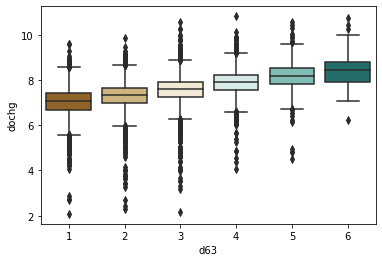

In [86]:
sns.boxplot(x = gosp.d63, y = np.log(gosp.dochg), palette = "BrBG")

In [79]:
gosp.pivot_table(values = "dochg", 
                 index = "d63", 
                 aggfunc = {("mediana", np.median), ("średnia", np.mean)})

,mediana,średnia
d63,,
1,1199.320,1365.057137
2,1549.250,1736.274390
3,1977.000,2206.640157
4,2732.300,3072.951669
5,3618.645,4314.058254
6,4754.460,5773.696447


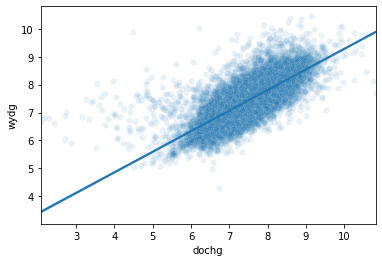

In [96]:
sns.scatterplot(x = np.log(gosp.dochg), y = np.log(gosp.wydg), alpha = 0.1)
sns.regplot(x = np.log(gosp.dochg), y = np.log(gosp.wydg), scatter = False)

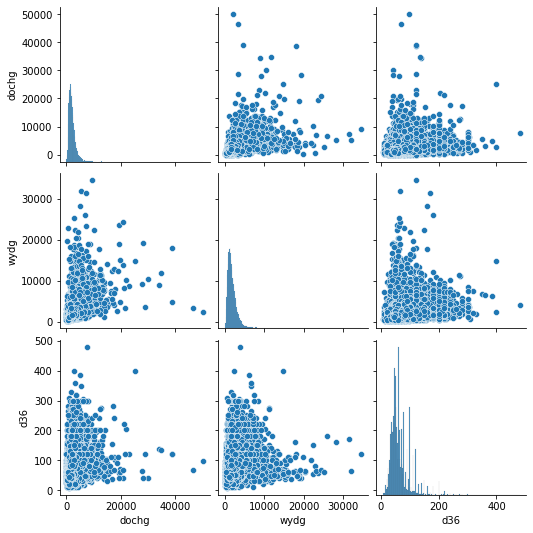

In [97]:
sns.pairplot(data = gosp, vars = ["dochg", "wydg", "d36"])